<a href="https://colab.research.google.com/github/saatweek/gdp_vs_medals/blob/main/olympics_gpd_vs_medals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)
library(ggplot2)

In [ ]:
data <- read.csv("winter_olympic_study.csv")
head(data)

,year,host_country,host_city,country_name,country_code,Gold,Silver,Bronze,GDP,gdp_per_capita,Atheletes,Total_Points
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1984,Yugoslavia,Sarajevo,Austria,AUT,0,0,1,67985346560,8991.065,65,3
2,1984,Yugoslavia,Sarajevo,Canada,CAN,2,1,1,355372990464,13877.917,67,19
3,1984,Yugoslavia,Sarajevo,Finland,FIN,4,3,6,52888801280,10833.866,45,54
4,1984,Yugoslavia,Sarajevo,France,FRA,0,1,2,530683985920,9419.696,32,10
5,1984,Yugoslavia,Sarajevo,Great Britain,GBR,1,0,0,461487013888,8179.194,30,6
6,1984,Yugoslavia,Sarajevo,Italy,ITA,2,0,0,437887991808,7739.715,74,12


In [ ]:
dim(data)

[1] 175  12

In [ ]:
# check NA
sum(is.na(data))

[1] 0

In [ ]:
#transforming
data$loggdp <- log(data$GDP)

# EDA

In [ ]:
summary(data)

      year      host_country        host_city         country_name      
 Min.   :1984   Length:175         Length:175         Length:175        
 1st Qu.:1994   Class :character   Class :character   Class :character  
 Median :2002   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2003                                                           
 3rd Qu.:2012                                                           
 Max.   :2018                                                           
 country_code            Gold            Silver           Bronze      
 Length:175         Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 Class :character   1st Qu.: 0.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Mode  :character   Median : 2.000   Median : 2.000   Median : 2.000  
                    Mean   : 2.891   Mean   : 2.857   Mean   : 2.977  
                    3rd Qu.: 4.000   3rd Qu.: 4.500   3rd Qu.: 4.500  
                    Max.   :14.000   Max.   :15.000   Max.   :1

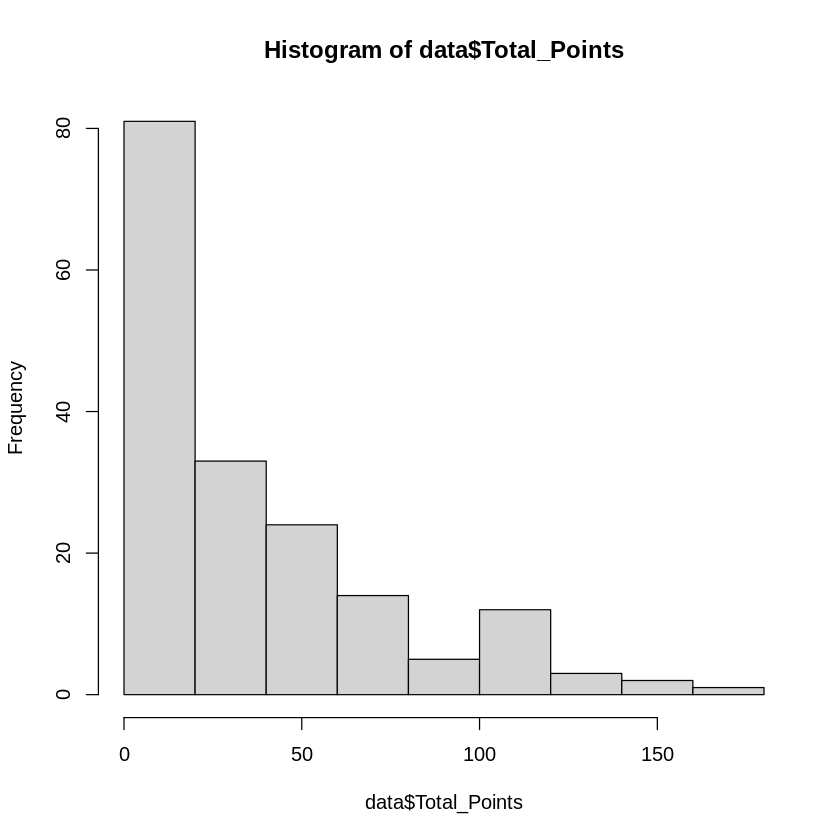

In [ ]:
hist(data$Total_Points)

In [ ]:
data %>%
  arrange(Total_Points) %>%
  head(10)

,year,host_country,host_city,country_name,country_code,Gold,Silver,Bronze,GDP,gdp_per_capita,Atheletes,Total_Points
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1984,Yugoslavia,Sarajevo,Austria,AUT,0,0,1,6.798535e+10,8991.065,65,3
2,1988,Canada,Calgary,Japan,JPN,0,0,1,3.071680e+12,25059.008,48,3
3,1988,Canada,Calgary,Liechtenstein,LIE,0,0,1,1.161758e+09,41292.258,13,3
4,1992,France,Albertville,Spain,ESP,0,0,1,6.309160e+11,16112.188,17,3
5,1992,France,Albertville,North Korea,PRK,0,0,1,1.245800e+10,595.000,20,3
6,1994,Norway,Lillehammer,Australia,AUS,0,0,1,3.228070e+11,18079.381,25,3
7,1998,Japan,Nagano,Australia,AUS,0,0,1,3.994040e+11,21345.971,23,3
8,1998,Japan,Nagano,Belgium,BEL,0,0,1,2.585280e+11,25338.443,1,3
9,1998,Japan,Nagano,Great Britain,GBR,0,0,1,1.653390e+12,28269.322,34,3


In [ ]:
data %>%
  arrange(desc(Total_Points)) %>%
  head(10)

,year,host_country,host_city,country_name,country_code,Gold,Silver,Bronze,GDP,gdp_per_capita,Atheletes,Total_Points,loggdp
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,2018,South Korea,Pyeongchang,Norway,NOR,14,14,11,4.37000e+11,82267.81,109,173,26.80320
2,2010,Canada,Vancouver,United States,USA,9,15,13,1.49921e+13,48466.66,216,153,30.33854
3,2002,United States,Salt Lake City,United States,USA,10,13,11,1.09364e+13,38023.16,202,145,30.02312
4,2014,Russia,Sochi,Russia,RUS,11,10,9,2.05924e+12,14095.65,232,133,28.35336
5,2018,South Korea,Pyeongchang,Canada,CAN,11,8,10,1.72185e+12,46454.74,225,128,28.17442
6,2010,Canada,Vancouver,Canada,CAN,14,7,5,1.61734e+12,47562.08,206,127,28.11180
7,2014,Russia,Sochi,United States,USA,9,9,10,1.75272e+13,55049.99,222,120,30.49478
8,1994,Norway,Lillehammer,Norway,NOR,10,11,5,1.27131e+11,29315.84,88,119,25.56848
9,2002,United States,Salt Lake City,Norway,NOR,13,5,7,1.95524e+11,43084.47,77,119,25.99895


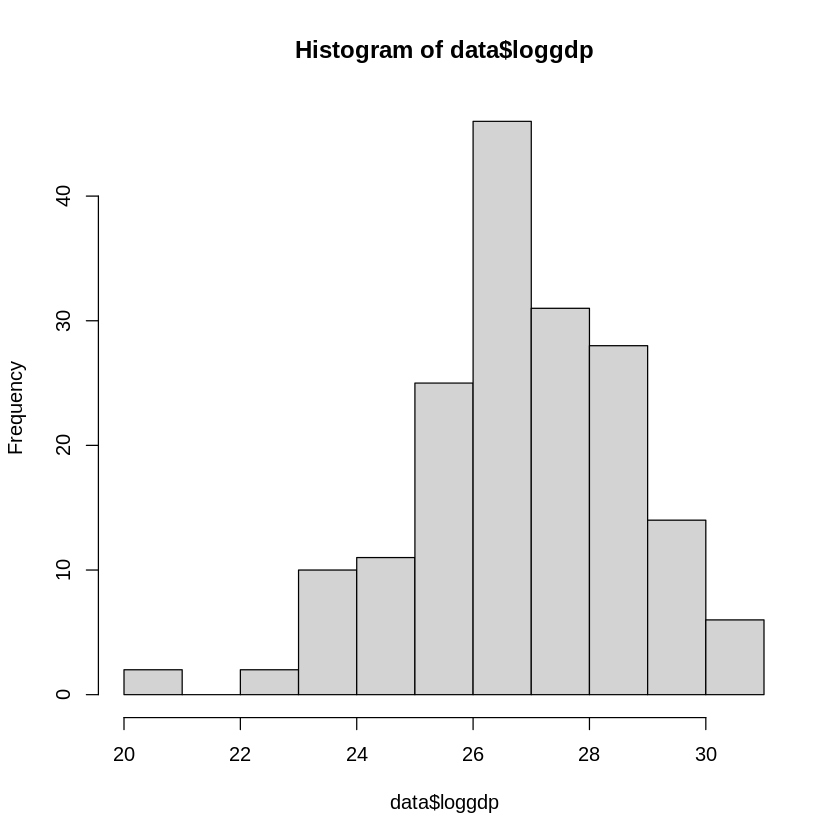

In [ ]:
hist(data$loggdp)

In [ ]:
data %>%
  arrange(loggdp) %>%
  head(10)

,year,host_country,host_city,country_name,country_code,Gold,Silver,Bronze,GDP,gdp_per_capita,Atheletes,Total_Points,loggdp
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,1984,Yugoslavia,Sarajevo,Liechtenstein,LIE,0,0,2,502617344,18596.1719,10,6,20.03534
2,1988,Canada,Calgary,Liechtenstein,LIE,0,0,1,1161757696,41292.2578,13,3,20.87320
3,2018,South Korea,Pyeongchang,Liechtenstein,LIE,0,0,1,6839144960,180366.7188,3,3,22.64593
4,2002,United States,Salt Lake City,Estonia,EST,1,1,1,7367975936,5341.6289,17,13,22.72041
5,1992,France,Albertville,North Korea,PRK,0,0,1,12458000000,595.0000,20,3,23.24563
6,1994,Norway,Lillehammer,Uzbekistan,UZB,1,0,0,12899156992,576.4471,7,6,23.28043
7,2002,United States,Salt Lake City,Belarus,BLR,0,0,1,14594248704,1479.3146,64,3,23.40389
8,1998,Japan,Nagano,Belarus,BLR,0,0,2,15264369664,1515.5308,59,6,23.44879
9,1992,France,Albertville,Luxembourg,LUX,0,2,0,15518702592,39570.8633,1,8,23.46531


In [ ]:
data %>%
  arrange(desc(loggdp)) %>%
  head(10)

,year,host_country,host_city,country_name,country_code,Gold,Silver,Bronze,GDP,gdp_per_capita,Atheletes,Total_Points,loggdp
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,2018,South Korea,Pyeongchang,United States,USA,9,8,6,2.06119e+13,63064.418,241,104,30.65689
2,2014,Russia,Sochi,United States,USA,9,9,10,1.75272e+13,55049.988,222,120,30.49478
3,2010,Canada,Vancouver,United States,USA,9,15,13,1.49921e+13,48466.656,216,153,30.33854
4,2018,South Korea,Pyeongchang,China,CHN,1,6,2,1.38948e+13,9905.342,80,36,30.26254
5,2006,Italy,Turin,United States,USA,9,9,7,1.38146e+13,46298.730,204,111,30.25675
6,2002,United States,Salt Lake City,United States,USA,10,13,11,1.09364e+13,38023.160,202,145,30.02312
7,2014,Russia,Sochi,China,CHN,3,4,2,1.04757e+13,7636.117,66,40,29.98008
8,1998,Japan,Nagano,United States,USA,6,3,4,9.06282e+12,32853.676,186,60,29.83520
9,1994,Norway,Lillehammer,United States,USA,6,5,2,7.28724e+12,27694.854,147,62,29.61715


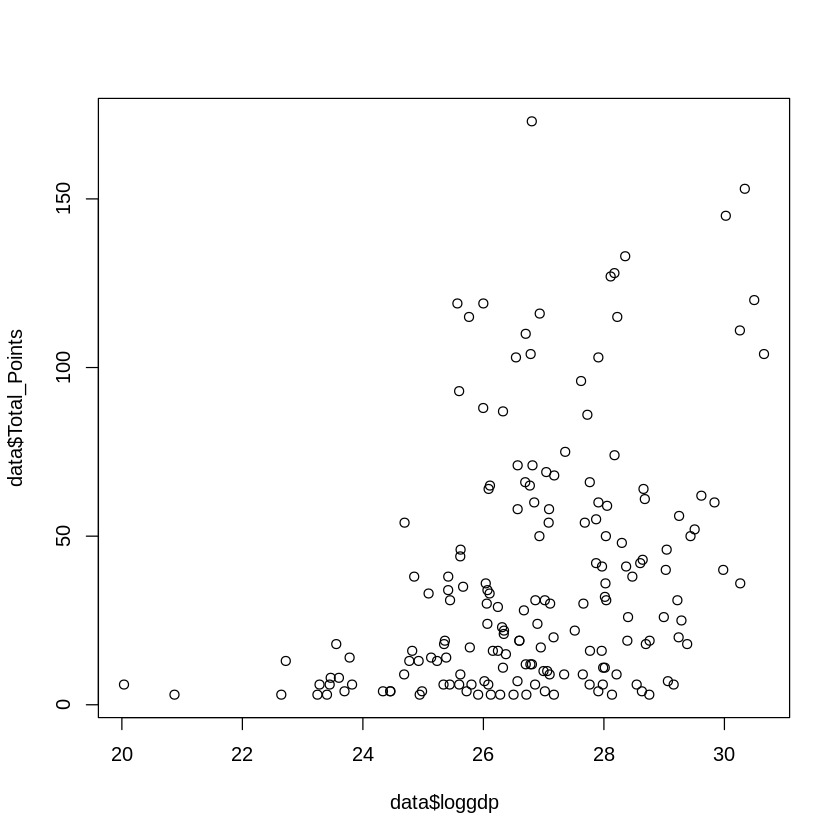

In [ ]:
plot(data$Total_Points ~ data$loggdp)

In [ ]:
cor(data$Total_Points, data$loggdp)

[1] 0.3634596

# Check assumptions

`geom_smooth()` using formula = 'y ~ x'


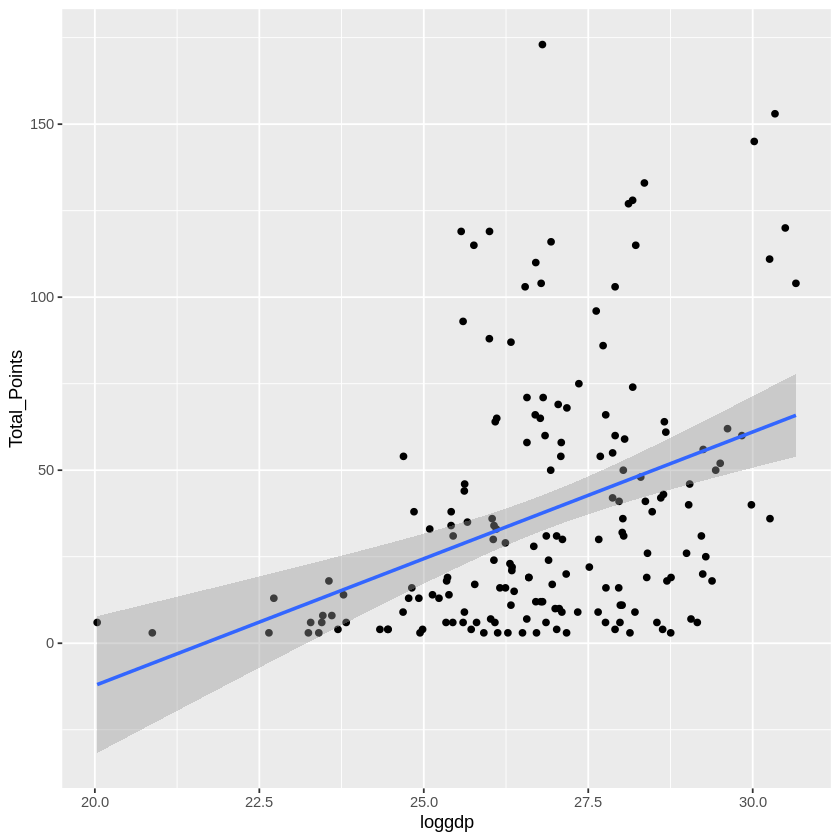

In [ ]:
# 1. Linearity
library(ggplot2)

ggplot(data, aes(x = loggdp, y = Total_Points)) + 
  geom_point() +
    geom_smooth(method = "lm")

# 2. Independence

Each country is independent of each other.
We can safely assume that all the country's GDP's and number of medals are independent of each other

In [ ]:
# 2. Independence


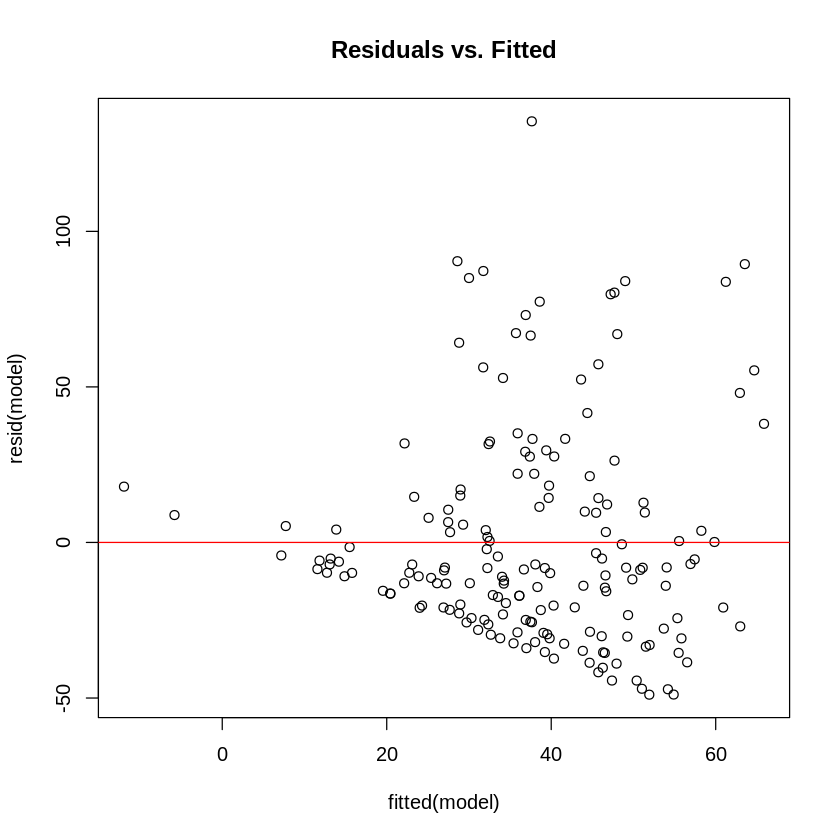

In [ ]:
# 3. Equal variance
# Run model with transformed x
model <- lm(Total_Points ~ loggdp, data = data)

plot(resid(model) ~ fitted(model), main = "Residuals vs. Fitted")  
abline(h = 0, col = "red") 

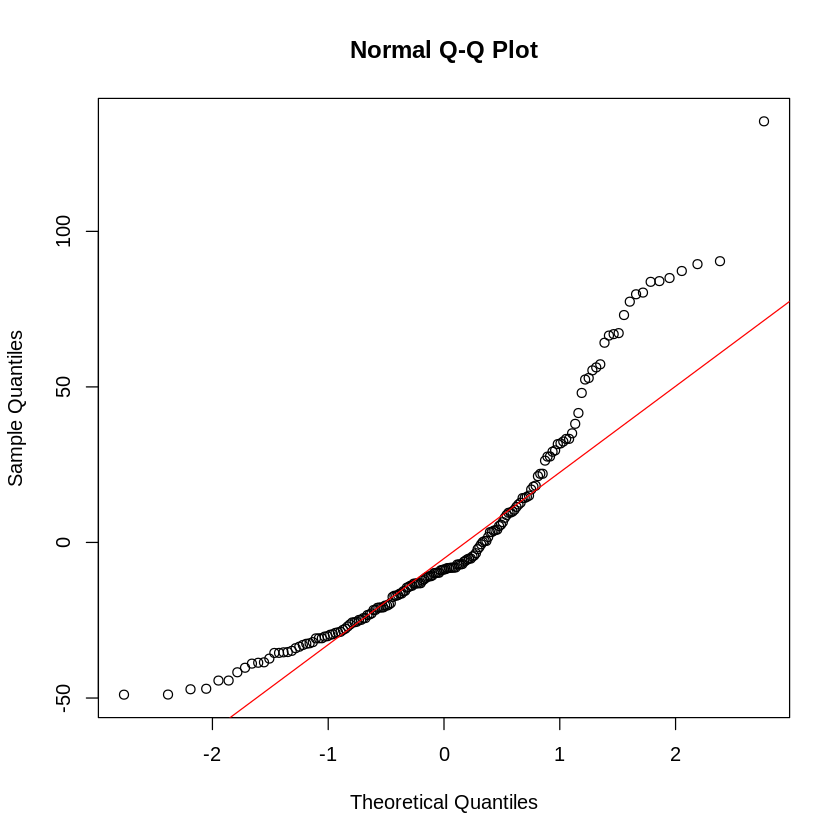

In [ ]:
# 4. Normality
# Check Normality Assumption
qqnorm(resid(model))
qqline(resid(model), col = "red")


# Linear Regression

In [ ]:
model


Call:
lm(formula = Total_Points ~ loggdp, data = data)

Coefficients:
(Intercept)       loggdp  
   -158.733        7.326  


In [ ]:
summary(model)


Call:
lm(formula = Total_Points ~ loggdp, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.925 -23.823  -8.679  13.521 135.361 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -158.733     38.369  -4.137 5.48e-05 ***
loggdp         7.326      1.428   5.132 7.66e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.35 on 173 degrees of freedom
Multiple R-squared:  0.1321,	Adjusted R-squared:  0.1271 
F-statistic: 26.33 on 1 and 173 DF,  p-value: 7.662e-07


In [ ]:
# confidence interval b1
li <- 7.326 - qt(0.975, 173)*1.428
ui <- 7.326 + qt(0.975, 173)*1.428
c(li, ui)

[1]  4.507455 10.144545

In [ ]:
confint(model)

,2.5 %,97.5 %
(Intercept),-234.465299,-83.00056
loggdp,4.508402,10.14443


Secondary Analysis

In [ ]:
model2 <- lm(Total_Points ~ Atheletes, data = data)

In [ ]:
model2


Call:
lm(formula = Total_Points ~ Atheletes, data = data)

Coefficients:
(Intercept)    Atheletes  
    -5.0620       0.5276  


In [ ]:
summary(model2)


Call:
lm(formula = Total_Points ~ Atheletes, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.032 -16.492  -2.546   8.195 120.551 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.06204    3.54032   -1.43    0.155    
Atheletes    0.52762    0.03695   14.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.98 on 173 degrees of freedom
Multiple R-squared:  0.5411,	Adjusted R-squared:  0.5384 
F-statistic:   204 on 1 and 173 DF,  p-value: < 2.2e-16


In [ ]:
# confidence interval b1
li <- 0.52762 - qt(0.975, 173)*0.03695
ui <- 0.52762 + qt(0.975, 173)*0.03695
c(li, ui)

[1] 0.4546891 0.6005509

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


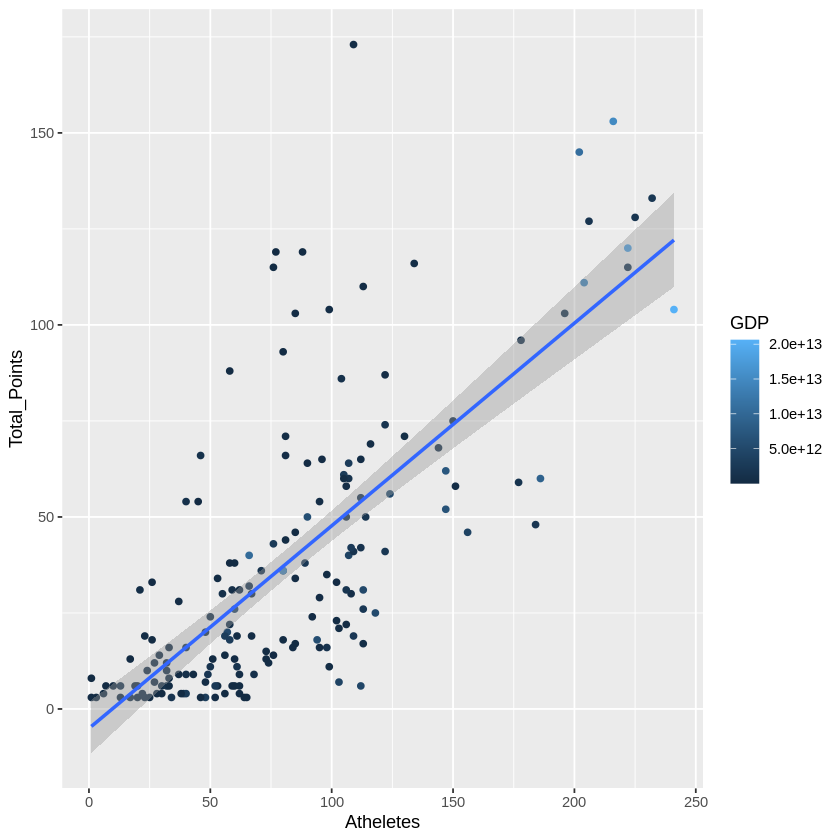

In [ ]:
ggplot(data, aes(x = Atheletes, y = Total_Points, color = GDP)) + 
  geom_point() +
    geom_smooth(method = "lm")